In [1]:
import json
import datetime
import pandas as pd
import pprint
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
with open('/Users/das1192/Downloads/json (7).txt','r') as f:
    for line in f.readlines()[1:]:
        raw = line
    
data = json.loads(raw)  
data.keys()
# pprint.pprint(data['changelog'])


[u'chunkedSnapshot', u'changelog']

In [50]:
class changelog_parser:
    def __init__(self, gdoc_data):
        self.doc = None
        self.logs = []
        
        with open(gdoc_data,'r') as f:
            for line in f.readlines()[1:]:
                self.changelog = json.loads(line)['changelog']
    
    def log_entry(self, log):
        return {
            'changes': None,
            'time': log[1],
            'user_id': log[2],
            'index': log[3],
            'bigstring': log[4],
            'unknown_index': log[5],
            'unknown_item': log[6],
            'log_type': log[0]['ty']
        }
     
    def parse(self):
        for log in self.changelog:
            datum = self.log_entry(log) 
            changes = self._extract(log[0])
            if changes:
                datum['changes'] = changes
                            
            self.logs.append(datum)
        
    def _extract(self, log):
        '''
        To be written. 
        '''
        try:
            extract = getattr(changelog_parser, '_extract_' + log['ty'])
            changes = extract(self, log)
            return changes
        except:
            print "Did not work: %s" % log['ty']
#             print log
            return None
            
    def _extract_is(self, log):
        '''
        is =? insert str
        '''
        return log['s']
    
    def _extract_ds(self, log):
        '''
        ds =? delete str
        '''
        return log
    
    def _extract_mlti(self, log):
        '''
        mlti =? multiple type interactions
        '''
        mltichanges = []
        for sublog in log['mts']:
            mltichanges.append(self._extract(sublog))

        mltichanges = [x for x in mltichanges if x is not None]
            
        return mltichanges
            
cp = changelog_parser('/Users/das1192/Downloads/json (11).txt')
cp.parse()
col_order = ['time','user_id','log_type','changes']
data = pd.DataFrame(cp.logs)#[col_order]  
data.ix[:,'time'] =  data.time.apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))

# print data
print len(data)

Did not work: rplc
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work: as
Did not work

In [51]:
print data.tail()

             bigstring                                         changes  index  \
6495  784628e8c0e0744e  [{u'si': 4251, u'ei': 4256, u'ty': u'ds'}, in]   6496   
6496  784628e8c0e0744e                                              st   6497   
6497  784628e8c0e0744e                                            ruct   6498   
6498  784628e8c0e0744e                                           ional   6499   
6499  784628e8c0e0744e          [{u'si': 25, u'ei': 25, u'ty': u'ds'}]   6500   

     log_type                    time  unknown_index unknown_item  \
6495     mlti 2016-03-24 08:37:03.958           2647         None   
6496       is 2016-03-24 08:37:04.183           2648         None   
6497       is 2016-03-24 08:37:04.466           2649         None   
6498       is 2016-03-24 08:37:04.877           2650         None   
6499     mlti 2016-03-24 08:37:15.345           2651         None   

                   user_id  
6495  07412325945122838097  
6496  07412325945122838097  
6497  07412

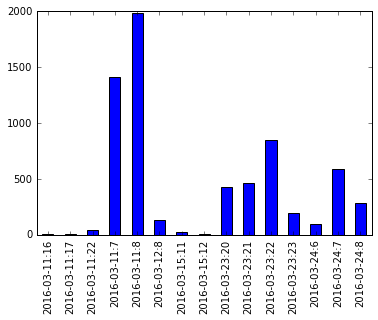

In [52]:
data.time.apply(lambda x: str(x.date())+':'+str(x.hour)).value_counts().sort_index().plot(kind='bar')

In [53]:
print ''.join(data[data.changes.apply(lambda x: type(x)==unicode)].changes.values).encode('utf-8')

roposproposed network is to develop deeper understanding of the accessibility challenges faced by millions of learners who participate in online learning  -- including people with disabilities and English language learners (ELL) --experiences such as massive open online courses (MOOCs), blended learning environments, well as .g., MOOCs), moy of which are built for.ll in online education programs such as .  Moreover, b hy harnessing expertise from domains iverse domains including language earning sciencesk la, language pedagogy, acassessment, e educationallearning analytics, human-computer interactino, , and educational policymachine learning, , we will explore inging together experts from educational technology, nce the the identifydesign Moreover, by conducting experiments in accessibility experiments  conduccting einvestigating conducting experiments on eover, by conducting experiments on live online courses offered by HarvardX -- one of the largest provi providers of massive opne  o

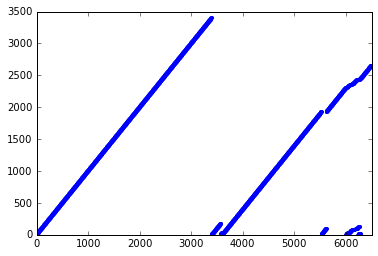

In [65]:
data.unknown_index.plot(style='.')
# data.unknown_index.hist(bins=100)
# data.unknown_index
# data.plot(x='index',y='unknown_index')

In [60]:
pd.crosstab(data.time.apply(lambda x: str(x.date())+':'+str(x.hour)), data.user_id)

user_id,02514330190123192772,07412325945122838097,12415854597074429213,18196394530356488829
time,,,,
2016-03-11:16,0,0,0,6
2016-03-11:17,0,0,0,1
2016-03-11:22,0,45,0,0
2016-03-11:7,0,1414,0,0
2016-03-11:8,0,1984,0,0
2016-03-12:8,0,127,0,0
2016-03-15:11,0,27,0,0
2016-03-15:12,0,0,0,3
2016-03-23:20,0,425,0,0


### Step through some of the entries in changelog
Use first index to observe changes. 

In [143]:
data['changelog'][142][0:2]

[{u'mts': [{u'ibi': 209, u's': u'\n', u'ty': u'is'},
   {u'ei': 209,
    u'fm': False,
    u'si': 209,
    u'sm': {u'ps_al': 0,
     u'ps_al_i': True,
     u'ps_awao': False,
     u'ps_awao_i': True,
     u'ps_hd': 0,
     u'ps_hdid': u'',
     u'ps_ifl': 18.0,
     u'ps_ifl_i': False,
     u'ps_il': 36.0,
     u'ps_il_i': False,
     u'ps_ir': 0.0,
     u'ps_ir_i': True,
     u'ps_klt': False,
     u'ps_klt_i': True,
     u'ps_kwn': False,
     u'ps_kwn_i': True,
     u'ps_ls': 1.15,
     u'ps_ls_i': True,
     u'ps_ltr': True,
     u'ps_sa': 0.0,
     u'ps_sa_i': True,
     u'ps_sb': 0.0,
     u'ps_sb_i': True,
     u'ps_shd': False,
     u'ps_sm': 0,
     u'ps_sm_i': False,
     u'ps_ts': {u'cv': {u'op': u'set', u'opValue': []}}},
    u'st': u'paragraph',
    u'ty': u'as'},
   {u'ei': 209,
    u'fm': False,
    u'si': 209,
    u'sm': {u'ls_id': u'kix.9ja463evpgq6',
     u'ls_nest': 0,
     u'ls_ts': {u'ts_bd': False,
      u'ts_bd_i': True,
      u'ts_bgc': None,
      u'ts_bgc_i': 

### Counter keys in first 150 logs in changelog
Shows some of the data patterns so we can try to infer what is changing.

In [93]:
from collections import Counter
C = Counter()
for i in range(0,150):
    C = C + Counter(data['changelog'][i][0].keys())

print C

Counter({u'ty': 150, u'ibi': 111, u's': 111, u'mts': 28, u'epm': 6, u'id': 6, u'ei': 5, u'si': 5})
